In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
house_data = pd.read_csv("USA_Housing.csv")
house_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
house_data.drop("Address",axis=1,inplace=True)

In [4]:
house_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

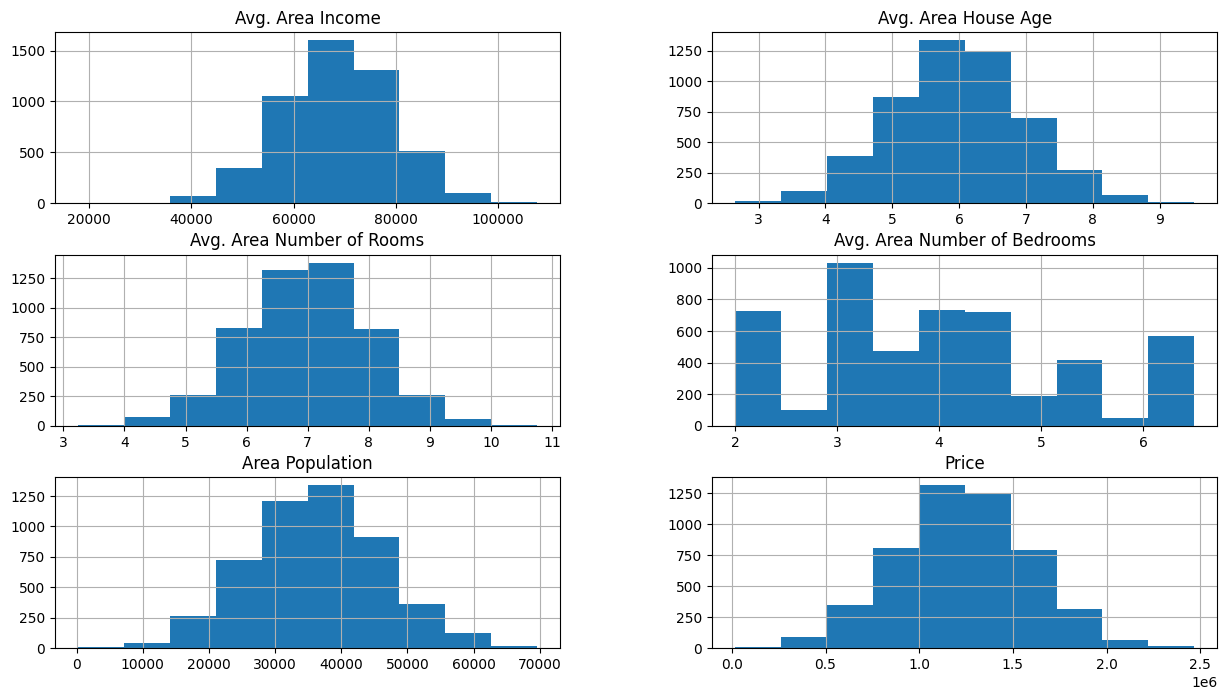

In [6]:
house_data.hist(figsize=(15,8))

In [9]:
house_data["Bedroom ratio"] = house_data["Avg. Area Number of Bedrooms"] / house_data["Avg. Area Number of Rooms"]
house_data.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Bedroom ratio
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,0.583520
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,0.459082


<Axes: >

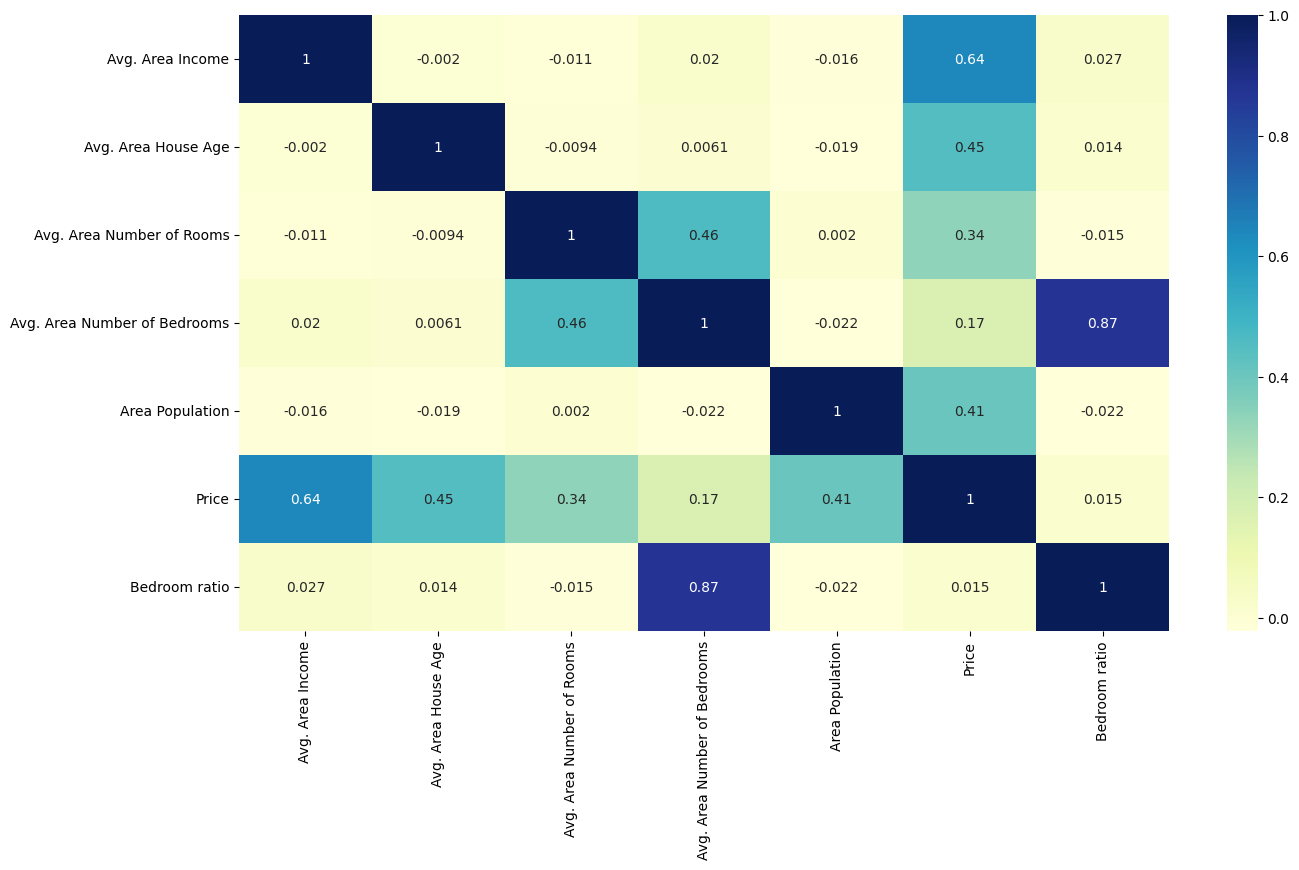

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(house_data.corr(), annot=True, cmap="YlGnBu")

In [11]:
house_data.drop("Bedroom ratio",axis=1,inplace=True)

In [12]:
house_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


<Axes: title={'center': 'Avg. Area House Age'}, ylabel='Frequency'>

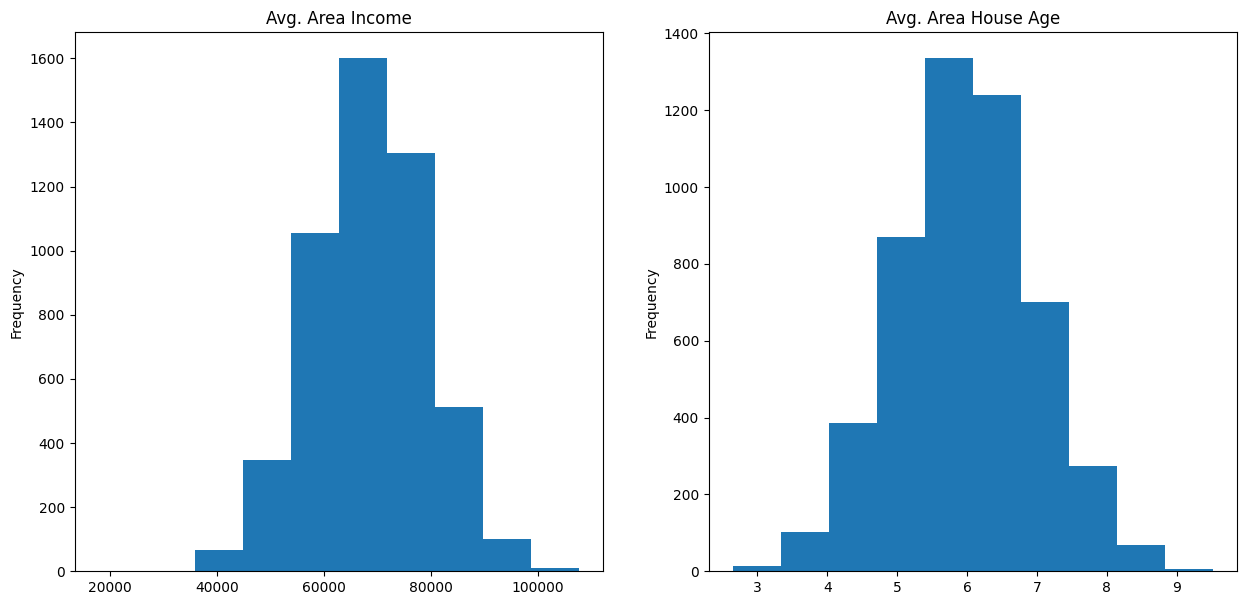

In [43]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title(house_data.columns[0])
house_data[house_data.columns[0]].plot(kind="hist")
plt.subplot(1,2,2)
plt.title(house_data.columns[1])
house_data[house_data.columns[1]].plot(kind="hist")


<Axes: title={'center': 'Price'}, ylabel='Frequency'>

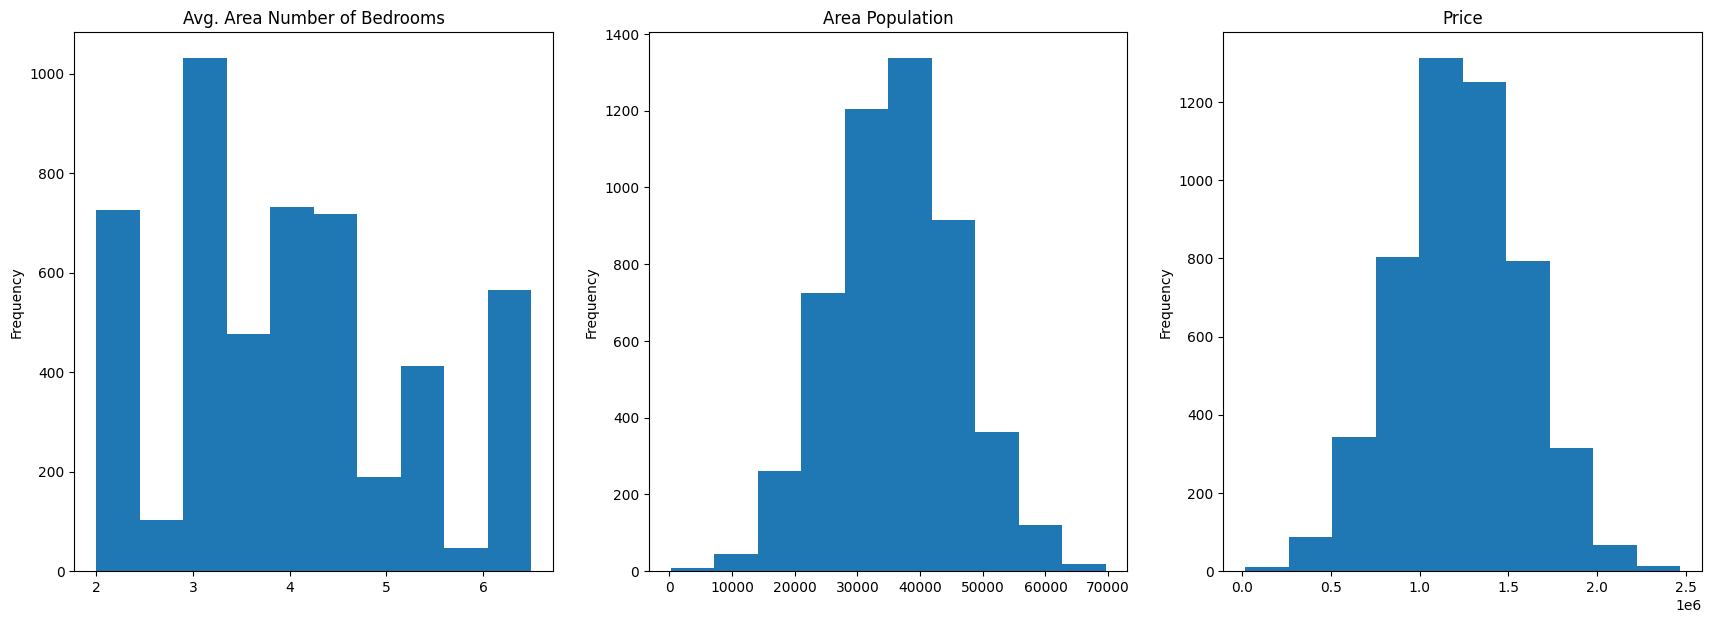

In [46]:
plt.figure(figsize=(21,7))
plt.subplot(1,3,1)
plt.title(house_data.columns[3])
house_data[house_data.columns[3]].plot(kind="hist")
plt.subplot(1,3,2)
plt.title(house_data.columns[4])
house_data[house_data.columns[4]].plot(kind="hist")
plt.subplot(1,3,3)
plt.title(house_data.columns[5])
house_data[house_data.columns[5]].plot(kind="hist")

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(house_data))

MinMaxScaler()


In [64]:
m = scaler.transform(house_data)
m = pd.DataFrame(m,columns=house_data.columns)
m.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [67]:
scaled_house_data = m

In [68]:
scaled_house_data.head(4)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384


In [69]:
len(scaled_house_data)

5000

## Splitting the data

In [70]:
from sklearn.model_selection import train_test_split
X = scaled_house_data.drop("Price",axis=1)
y = scaled_house_data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 5), (1500, 5), (3500,), (1500,))

## Building the neural network model

### Model 1

In [72]:
#Set the random seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#Fit
history_1 = model_1.fit(X_train, y_train,epochs=100)

Epoch 1/100
110/110 [==============================] - 1s 2ms/step - loss: 0.8118 - mae: 0.8118
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1582 - mae: 0.1582
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1444 - mae: 0.1444
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1345 - mae: 0.1345
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1268 - mae: 0.1268
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1203 - mae: 0.1203
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1145 - mae: 0.1145
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1092 - mae: 0.1092
Epoch 9/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1038 - mae: 0.1038
Epoch 10/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0984 - mae: 0.0984
Epoch 11/100
110/110 [=================

In [74]:
y_preds = model_1.predict(X_test)

47/47 [==============================] - 0s 2ms/step


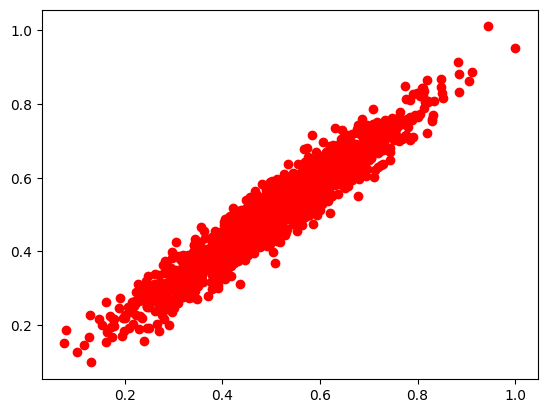

In [90]:
plt.scatter(y_test,y_preds,color="r")

In [96]:
scaled_house_data.iloc[112][:-1]

Avg. Area Income                0.485618
Avg. Area House Age             0.616550
Avg. Area Number of Rooms       0.422865
Avg. Area Number of Bedrooms    0.486667
Area Population                 0.441313
Name: 112, dtype: float64